In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
x = np.array([1,2,3,4])
y = np.array([7,6,8,9])

codev_xy = np.sum((x - np.mean(x)) * (y - np.mean(y))) # codeviance
ssd_x = np.sum((x - np.mean(x)) ** 2) # sum of squared deviations
ssd_y = np.sum((y - np.mean(y)) ** 2) # sum of squared deviations
corr_xy = codev_xy / np.sqrt(ssd_x * ssd_y)

corr_xy

0.8

In [3]:
def plot(x, y, xlabel = 'x', ylabel = 'y', savefig = None):
    
    count_green, count_red = 0, 0
        
    xmin, ymin = x.min(), y.min()
    xmax, ymax = x.max(), y.max()
    xmean, ymean = x.mean(), y.mean()
    
    codev_xy = np.sum((x - xmean) * (y - ymean)) # codevian
    ssd_x = np.sum((x - xmean) ** 2) # sum of squared deviations
    ssd_y = np.sum((y - ymean) ** 2) # sum of squared deviations
        
    diff = max(
        y.max() + np.abs(x[y.idxmax()] - xmean) / 2 - ymean,
        ymean - (y.min() - np.abs(xmean - x[y.idxmin()]) / 2),
        x.max() + np.abs(y[x.idxmax()] - ymean) / 2 - xmean,
        xmean - (x.min() - np.abs(ymean - y[x.idxmin()]) / 2)
    ) * 1.2
    xlim = xmean - diff, xmean + diff
    ylim = ymean - diff, ymean + diff
    
    nrows, ncols = 3, 2
    
    f, axs = plt.subplots(nrows, ncols, figsize = (ncols * 4, nrows * 5))
    f.suptitle('Correlation: {:.2f}'.format(np.corrcoef(x, y)[0, 1]), fontweight='bold')
    plt.subplots_adjust(hspace = .5)
            
    for en, (xp, yp) in enumerate(zip(x, y)):
        
        is_green = (xp > xmean and yp > ymean) or (xp < xmean and yp < ymean)
        is_red = not is_green
        count_green += is_green * 1
        count_red += is_red * 1
        
        if (is_green and count_green == 1) or (is_red and count_red == 1):
            label = ('$(x_i - \overline{x})\;(y_i - \overline{y}) \;\; \longleftarrow \;\;$' + ('sign: +' if is_green else 'sign: $-$'))
        else:
            label = None
        
        axs[divmod(1, ncols)].fill_between(
            [xp, xmean], [yp] * 2, [ymean] * 2, alpha = .3, color = 'green' if is_green else 'red', label = label
        )
        
        axs[divmod(2, ncols)].fill_between(
            [xp, xmean], [yp + np.abs(xp - xmean) / 2] * 2, [yp - np.abs(xp - xmean) / 2] * 2, 
            color = 'blue', alpha = .3, label = '$(x_i - \overline{x})^2$' if (count_green + count_red == 1) else None
        )
        
        axs[divmod(3, ncols)].fill_between(
            [xp - np.abs(yp - ymean) / 2, xp + np.abs(yp - ymean) / 2], [yp] * 2, [ymean] * 2, 
            color = 'fuchsia', alpha = .3, label = '$(y_i - \overline{y})^2$' if (count_green + count_red == 1) else None
        )
        
    for i in [1,2,3]:
        axs[divmod(i, ncols)].hlines(ymean, xlim[0], xlim[1], ls = '--', color = 'dimgrey')
        axs[divmod(i, ncols)].vlines(xmean, ylim[0], ylim[1], ls = '--', color = 'dimgrey')
        axs[divmod(i, ncols)].text(xmean + diff * .05, ylim[0] + diff * .05, '$\overline{x}$', color = 'dimgrey') 
        axs[divmod(i, ncols)].text(xlim[0] + diff * .05, ymean + diff * .05, '$\overline{y}$', color = 'dimgrey')
        axs[divmod(i, ncols)].legend(bbox_to_anchor=(0.5, 1.02), loc = 'lower center')
    
    for i in [0,1,2,3]:
        axs[divmod(i, ncols)].scatter(x, y, marker = 'x', color = 'black')
        axs[divmod(i, ncols)].set(xlabel = xlabel, ylabel = ylabel)
        
    axs[divmod(4, ncols)].fill_between(
        [xmean - (codev_xy ** .5) / 2, xmean + (codev_xy ** .5) / 2], 
        [ymean - (codev_xy ** .5) / 2] * 2,
        [ymean + (codev_xy ** .5) / 2] * 2,
        color = 'yellow', alpha = .3,
        label = '$\sum_{i = 1}^{n}(x_i - \overline{x})\;(y_i - \overline{y})$' + ' = {}'.format(round(codev_xy, 2))
    )    
        
    axs[divmod(5, ncols)].fill_between(
        [xmean - (ssd_x ** .5) / 2, xmean + (ssd_x ** .5) / 2], 
        [ymean - (ssd_y ** .5) / 2] * 2,
        [ymean + (ssd_y ** .5) / 2] * 2,
        color = 'purple', alpha = .3,
        label = '$\sqrt{\sum_{i = 1}^{n} (x_i - \overline{x})^2}\;\sqrt{\sum_{i = 1}^{n} (y_i - \overline{y})^2}$' + \
            ' = {}'.format(round(np.sqrt(ssd_x * ssd_y), 2))
    )
    
    for i in [4, 5]:
        axs[divmod(i, ncols)].set(xticks = [], yticks = [])
        axs[divmod(i, ncols)].legend(
            title = 'numerator:' if i == 4 else 'denominator:', 
            bbox_to_anchor=(0.5, 1.02), loc = 'lower center'
        )
        
    for i in range(nrows * ncols):
        axs[divmod(i, ncols)].set_aspect('equal')   
        axs[divmod(i, ncols)].set(xlim = xlim, ylim = ylim)
        
    if savefig is not None:
        f.savefig(savefig, dpi = 300, bbox_inches = 'tight')

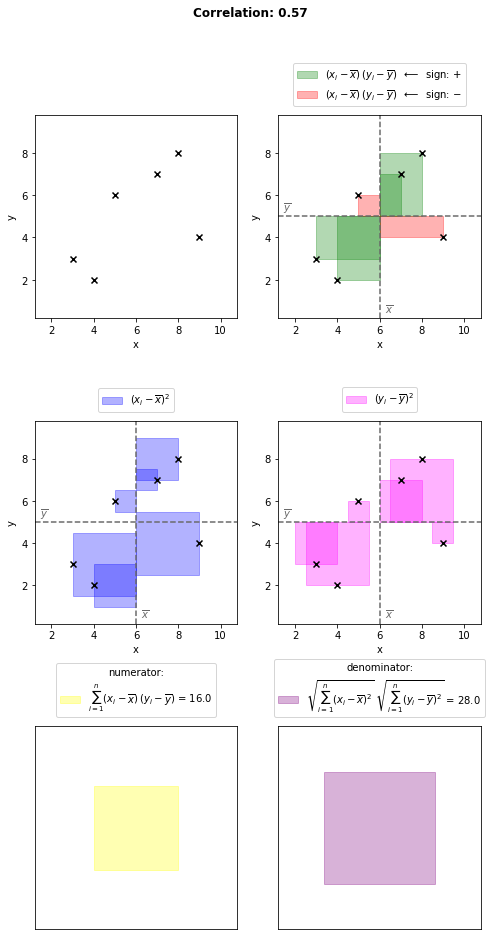

In [4]:
x, y = pd.Series([3, 5, 4, 7, 8, 9]), pd.Series([3, 6, 2, 7, 8, 4])

plot(x, y, savefig = 'main.png')

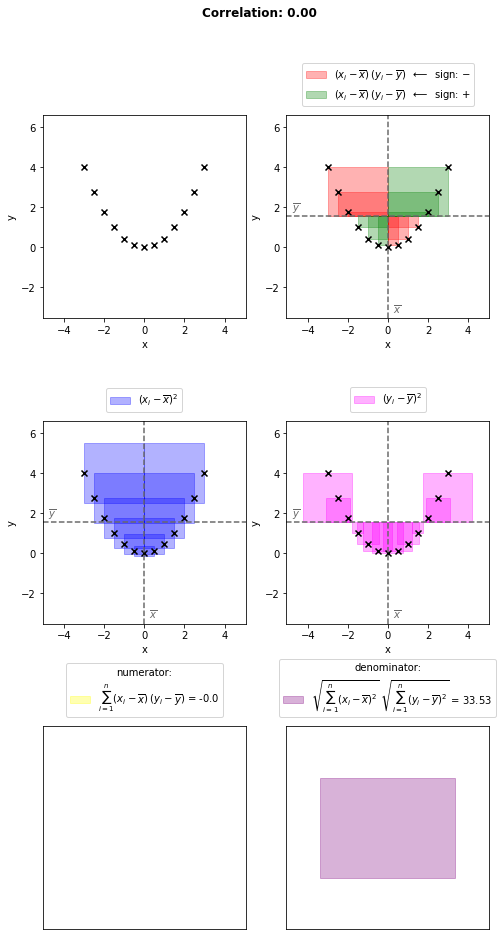

In [5]:
x = pd.Series(np.arange(-3, 3.5, .5))
y = (x / 1.5) ** 2

plot(x, y, savefig = 'parabola.png')

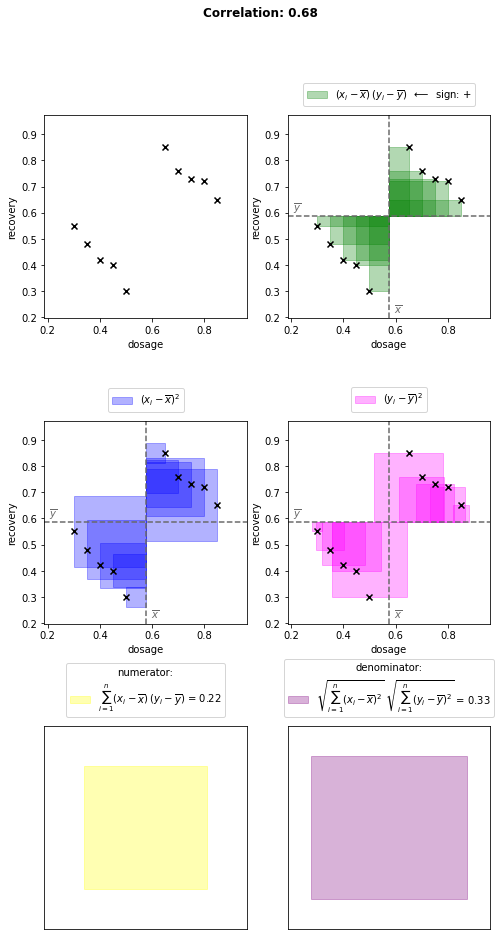

In [6]:
x = pd.Series([.30,.35,.40,.45,.50] + [.65,.7,.75,.80,.85])
y = pd.Series([.55,.48,.42,.40,.30] + [.85,.76,.73,.72,.65])

plot(x, y, xlabel = 'dosage', ylabel = 'recovery', savefig = 'simpson.png')